Shape of dataset: (150, 5)

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000  

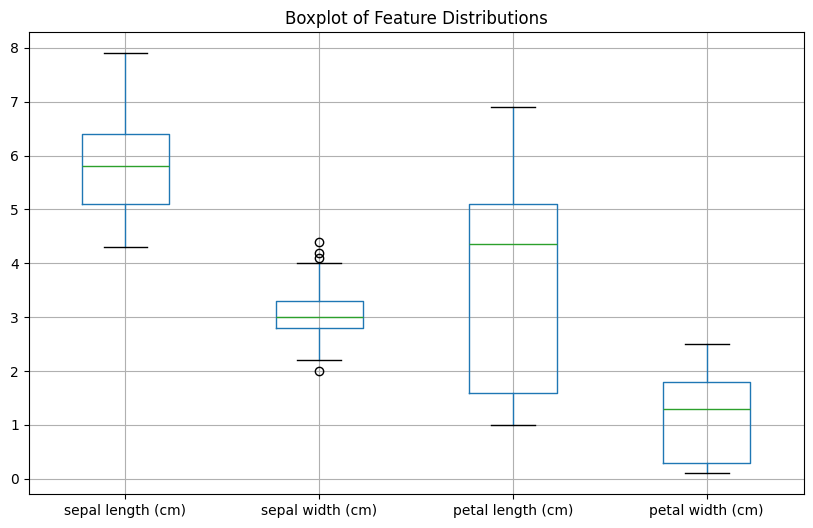

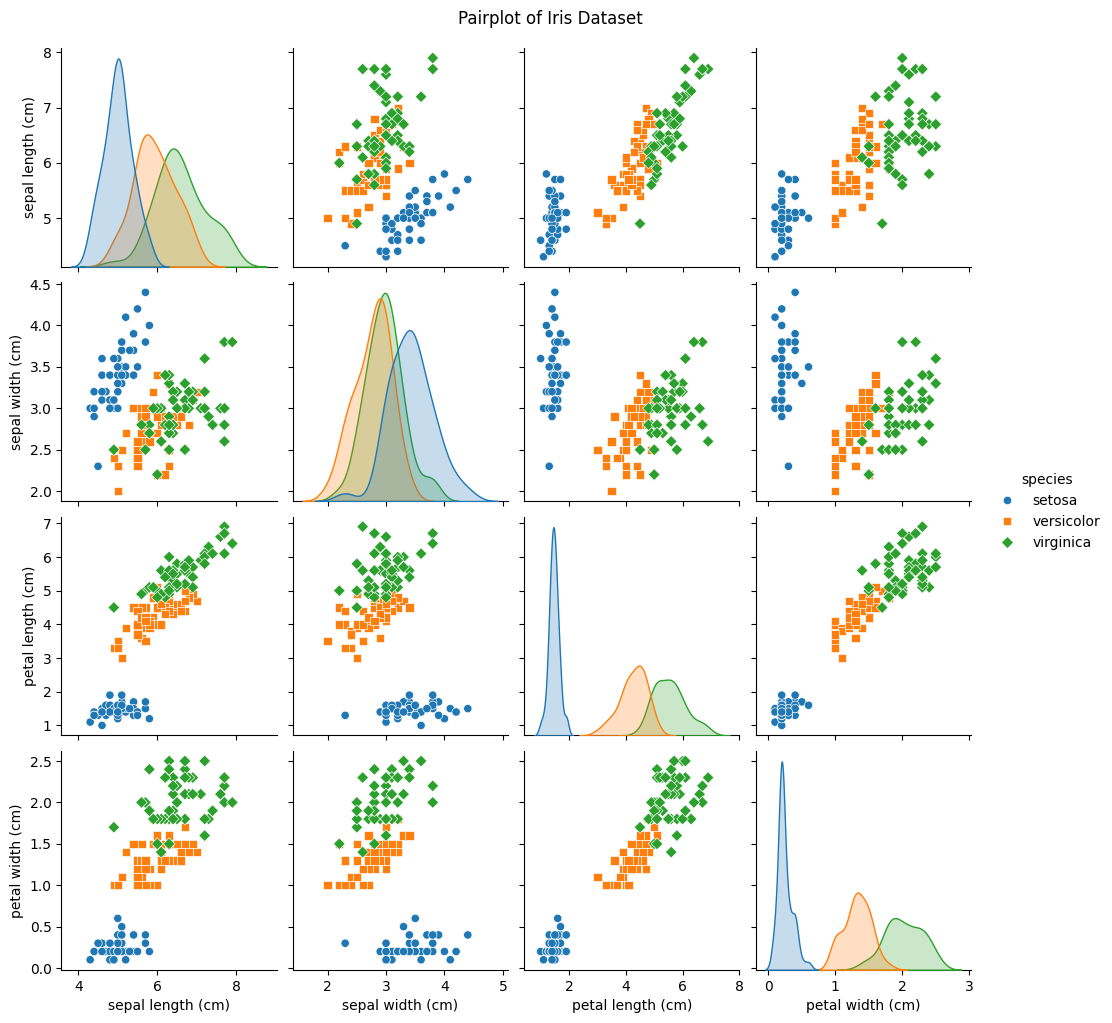

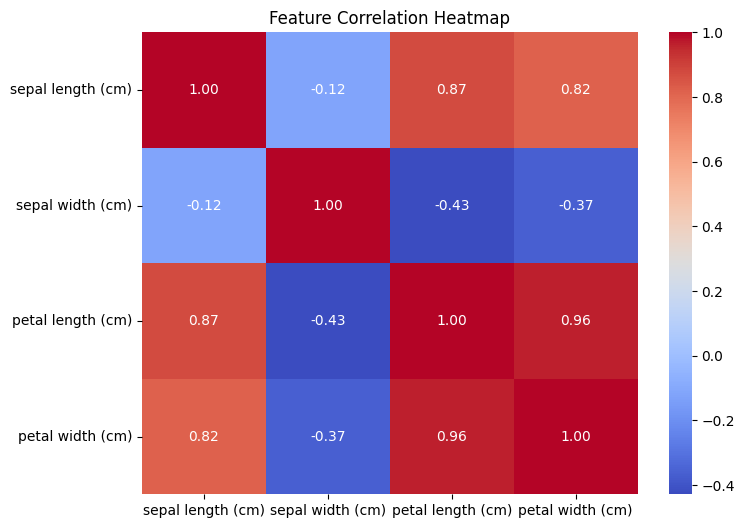

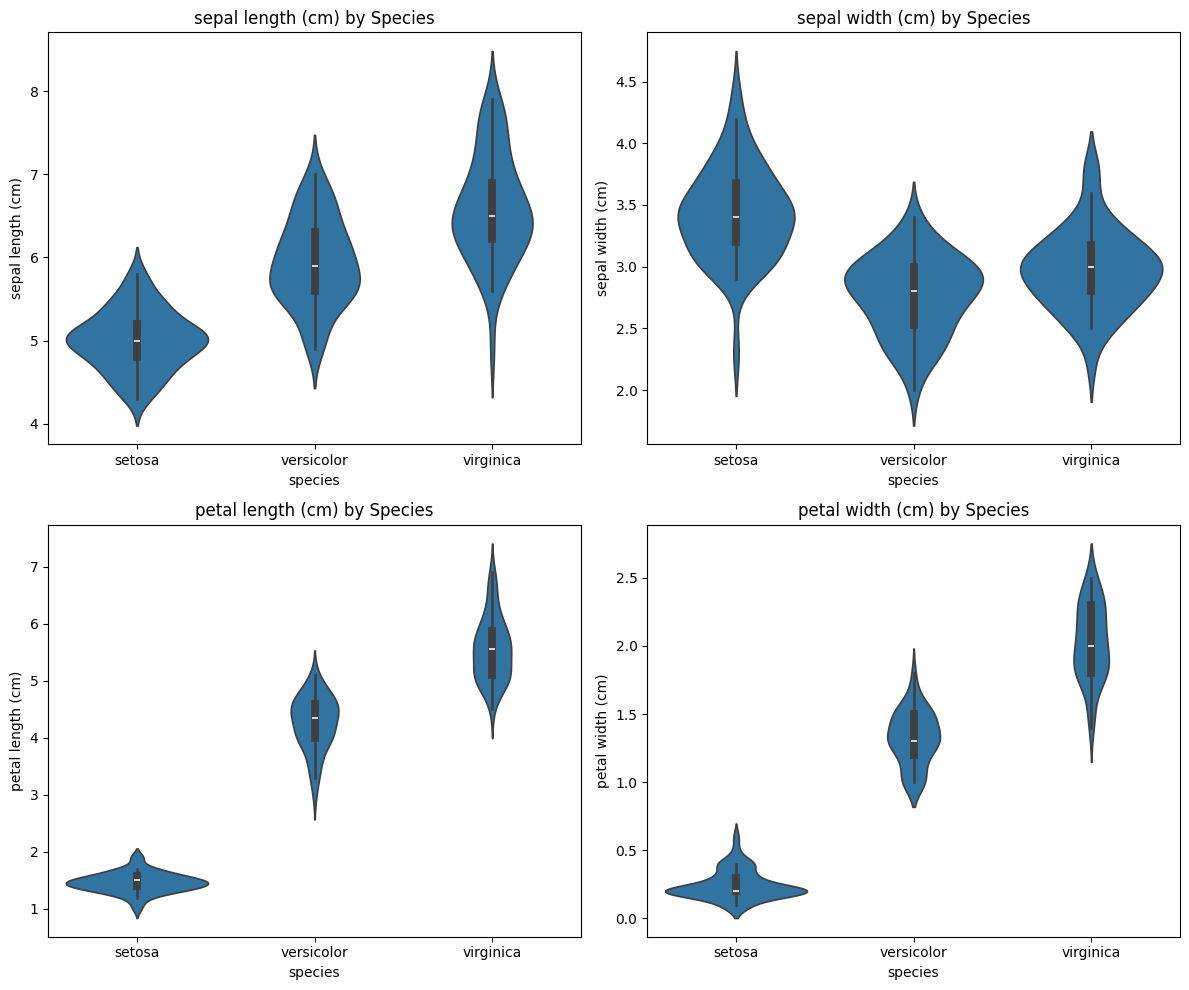

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 2: Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))

# Step 3: Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Class distribution
print("\nClass distribution:\n", df['species'].value_counts())

# Step 5: Boxplot
plt.figure(figsize=(10, 6))
df.drop('species', axis=1).boxplot()
plt.title("Boxplot of Feature Distributions")
plt.show()

# Step 6: Pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Step 7: Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df.drop("species", axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 8: Violin plot for each feature
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f'{col} by Species')
plt.tight_layout()
plt.show()
